# Казанова Анастасия Станиславовна, гр. 0373.
## Практическое задание по дисциплине "Теория принятия решений".  
### Вариант 139.  


### **Задание №1.**

Запасы товара на трех складах торговой компании, составляют 148, 108, и 101. Компания имеет
пункты реализации товара в пяти населенных пунктах, причем средние транспортные затраты
на перевозку единицы товара из складов в населенные пункты, а также спрос на товар в каждом
из пунктов указаны в табл. 1.
Для стимуляции спроса торговая компания может провести рекламную акцию в каждом из
пунктов. Потенциальный эффект от рекламной акции (увеличение спроса на единицу стоимости рекламной акции) зависит от бюджета рекламной акции. Параметры зависимости различны для городов и сведены в табл. 2. Следует обратить внимание, что эффект характеризуется
убывающей отдачей (что в определенной степени моделирует насыщение рынка). Так, например, при бюджете рекламной акции 120, увеличение спроса в первом городе будет вычисляться
следущим образом: $ 0.4 \cdot 40 + 0.3 \cdot 60 + 0.2 \cdot (120 - 40 - 60) $.
Требуется:
1. Определить минимальные издержки на реализацию всего товара.  

2. Выявить населенные пункты, требующие максимальный и минимальный рекламный бюджет.  

3. Провести анализ чувствительности оптимальной стратегии к стоимости перевозок между
складом 2 и населенным пунктом 3.


*Табл.1*

| Склад/Город | 1  | 2  | 3  | 4  | 5  |
|-------------|----|----|----|----|----|
| 1           | 10 | 10 | 7  | 7  | 7  |
| 2           | 5  | 7  | 6  | 5  | 7  |
| 3           | 10 | 9  | 10 | 9  | 9  |
| Спрос       | 56 | 37 | 53 | 26 | 47 |

*Табл.2*

| Стоимость акции | 1   | 2   | 3   | 4   | 5   |
|-----------------|-----|-----|-----|-----|-----|
| до 40           | 0.4 | 0.6 | 0.6 | 0.6 | 0.3 |
| до 100          | 0.3 | 0.5 | 0.5 | 0.5 | 0.2 |
| более 100       | 0.2 | 0.4 | 0.4 | 0.4 | 0.1 |

In [20]:
from cvxopt.modeling import variable, op
from cvxopt import matrix, solvers

### *1.1. Определим минимальные издержки на реализацию всего товара:*

Формальная постановка:  
$ F(x) = 10x_1 + 10x_2 + 7x_3 + 7x_4 + 7x_5 + 5x_6 + 7x_7 + 6x_8 + 5x_9 + 7x_{10} + 10x_{11} + 9x_{12} + 10x_{13} + 9x_{14} + 9x_{15} \to min$

$\left\{\begin{matrix}
x_1 + x_2 + x_3 + x_4 + x_5 \le 148  \\ 
x_6 + x_7 + x_8 + x_9 + x_{10} \le 108 \\ 
x_{11} + x_{12} + x_{13} + x_{14} + x_{15} \le 101 \\ 
x_1 + x_6 + x_{11} = 56 \\ 
x_2 + x_7 + x_{12} = 37 \\
x_3 + x_8 + x_{13} = 53 \\
x_4 + x_9 + x_{14} = 26 \\
x_5 + x_{10} + x_{15} = 47 \\
x \ge 0
\end{matrix}\right. $


Имеем классическую транспортную задачу линейного программирования. 

In [21]:
x = variable(15, 'x')
F = (10 * x[0] + 10 * x[1] + 7 * x[2] + 7 * x[3] + 7 * x[4] + 
     5 * x[5]+ 7 * x[6] + 6 * x[7] + 5 * x[8] + 7 * x[9] +
     10 * x[10] + 9 * x[11] + 10 * x[12] + 9 * x[13] + 9 * x[14])

lim1 = (x[0] + x[1] + x[2] + x[3] + x[4] <= 148)
lim2 = (x[5] + x[6] + x[7] + x[8] + x[9] <= 108)
lim3 = (x[10] + x[11] + x[12] + x[13] + x[14] <= 101)
lim4 = (x[0] + x[5] + x[3] == 56)
lim5 = (x[1] +x[6] + x[11] == 37)
lim6 = (x[2] + x[7] + x[12] == 53)
lim7 = (x[3] + x[8] + x[13] == 26)
lim8 = (x[4] + x[9] + x[14] == 47)   
problem = op(F, [lim1, lim2, lim3, lim4, lim5, lim6, lim7, lim8, x >= 0])
problem.solve(solver='glpk')  
print('Status: ', problem.status)
print('x: ', x.value)
print("Минимальные издержки на реализацию:")
print(problem.objective.value()[0])
print("Great")

Status:  optimal
x:  [ 0.00e+00]
[ 0.00e+00]
[ 1.20e+01]
[ 2.60e+01]
[ 4.70e+01]
[ 3.00e+01]
[ 3.70e+01]
[ 4.10e+01]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]

Минимальные издержки на реализацию:
1250.0
Great


Таким образом, получили значение минимальных издержек на реализацию товара равное 1250 единиц. 

### *1.2. Выявим населенные пункты, требующие максимальный и минимальный рекламный бюджет:*

Нужно все свести к одной общей сложной функции цели и решать линейное программирование

### **Задание №2.**

В районе города, схема которого изображена на рис. 1, рассматривается возможность размещения пожарных участков (возможные точки размещения обозначены номерами, линии соответствуют дорогам, а закрашенные эллипсы - природным объектам).  
Стоимость размещения участка в каждой из точек указана в табл. 3.   
Требуется найти такое размещение участков, при котором стоимость была бы минимальна, но (манхеттенское) расстояние от каждого перекрестка до ближайшего участка было не более 3.


*рис. 1*

![Условие задачи](images/image1.jpg "почему..")

*табл. 3*

| Расположение | Стоимость, д.е. |
|--------------|-----------------|
| 1            | 15              |
| 2            | 15              |
| 3            | 12              |
| 4            | 20              |
| 5            | 14              |

### Формальная постановка:

$ F = 15x_1 + 15x_2 + 12x_3 + 20x_4 + 14x_5 \to min $

Для составления системы ограничений пронумеруем все перекрестки, всего их 12, учитывая наличие природных объектов. Отобразим полученную схему на рис. 2.

![Пронумерованные перекрестки](images/image2.jpg "почему..")

Теперь, исходя из данной схемы, составим ограничения по каждому перекрестку:   

$1: 0x_1 + 1x_2 + 1x_3 + 0x_4 + 0x_5 \geqslant 1$  
$2: 0x_1 + 1x_2 + 1x_3 + 1x_4 + 0x_5 \geqslant 1$  
$3: 0x_1 + 1x_2 + 1x_3 + 1x_4 + 0x_5 \geqslant 1$  
$4: 1x_1 + 1x_2 + 1x_3 + 1x_4 + 1x_5 \geqslant 1$  
$5: 1x_1 + 0x_2 + 1x_3 + 1x_4 + 0x_5 \geqslant 1$  
$6: 1x_1 + 0x_2 + 1x_3 + 1x_4 + 1x_5 \geqslant 1$  
$7: 1x_1 + 1x_2 + 1x_3 + 1x_4 + 1x_5 \geqslant 1$  
$8: 1x_1 + 0x_2 + 1x_3 + 1x_4 + 1x_5 \geqslant 1$  
$9: 1x_1 + 0x_2 + 0x_3 + 1x_4 + 1x_5 \geqslant 1$  
$10: 1x_1 + 0x_2 + 1x_3 + 1x_4 + 1x_5 \geqslant 1$  
$11: 1x_1 + 0x_2 + 1x_3 + 1x_4 + 1x_5 \geqslant 1$  
$12: 1x_1 + 0x_2 + 1x_3 + 1x_4 + 0x_5 \geqslant 1$  



In [22]:
x = variable(5, 'x')
F = (15 * x[0] + 15 * x[1] + 12 * x[2] + 20 * x[3] + 14 * x[4])

lim1 = (x[1] + x[2] >=1)
lim2 = (x[1] + x[2] + x[3] >=1)
lim3 = (x[1] + x[2] + x[3] >=1)
lim4 = (x[0] + x[1] + x[2] + x[3] + x[4] >=1)
lim5 = (x[0] + x[2] + x[3] >=1)
lim6 = (x[0] + x[2] + x[3] + x[4] >=1)
lim7 = (x[0] + x[1] + x[2] + x[3] + x[4] >=1)
lim8 = (x[0] + x[2] + x[3] + x[4] >=1)
lim9 = (x[0] + x[3] + x[4] >=1)
lim10 = (x[0] + x[2] + x[3] + x[4] >=1)
lim11 = (x[0] + x[2] + x[3] + x[4] >=1)
lim12 = (x[0] + x[2] + x[3] >=1)
problem = op(F, [lim1, lim2, lim3, lim4, lim5, lim6, lim7, lim8, lim9, lim10, lim11, lim12, x >= 0])
problem.solve(solver='glpk')  
print('Status: ', problem.status)
print("Результат:")
print('x: ', x.value)
print('F = ', problem.objective.value()[0])

# c = matrix([15, 15, 12, 20, 14], tc = 'd')

# G = matrix([[0, 0, 0, 0, -1, -1, -1, -1, -1, -1, -1, -1],
           #[-1, -1, -1, -1, 0, 0, -1, 0, 0, 0, 0, 0], 
           #[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], 
           #[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], 
           
           #[0, 0, 0, -1, 0, -1, -1, -1, -1, -1, -1, 0]], tc = 'd')
#h = matrix([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], tc='d')


Status:  optimal
Результат:
x:  [ 0.00e+00]
[ 0.00e+00]
[ 1.00e+00]
[ 0.00e+00]
[ 1.00e+00]

F =  26.0


Получили следующий результат: минимальная стоимость размещения участков равна 26 при размещении двух участков: на точках 3 и 5. При этом отмечаем, что выполняется следующее условие: расстояние от каждого перекрестка до ближайшего участка не превышает 3 единицы по манхеттенской метрике. 

### **Задание №3.**

В целях проведения научного исследования планируется размещение автономного беспроводного сенсора с возможностью подзарядки (от солнечной батареи).  
Функционирование сенсора можно описать с помощью следующей модели с дискретным
временем. В каждый временной слот сенсор может либо осуществить передачу данных, либо
отложить ее. Решение принимается в зависимости от состояния среды передачи данных (уровень помех и пр.) и имеющейся у сенсора энергии. Передача сообщения требует одну единицу
энергии, при этом, при благоприятном состоянии среды передачи данных сообщение доходит
до получателя с вероятностью 0.99, а при неблагоприятном состоянии - с вероятностью 0.65.
Неопределенность, связанная с подзарядкой посредством солнечных батарей, раскрывается следующим образом. В каждый временной слот вероятность получения единицы энергии
равняется 0.2. Аккумулятор устройства рассчитан на 20 единиц энергии.  
Среда передачи данных может находиться в двух состояниях: благоприятном и неблагоприятном. Вероятность перехода из неблагоприятного в благоприятное (за один временной
слот) - 0.2, вероятность того, что канал останется в благоприятном состоянии - 0.7.   
  
Необходимо:
1. Определить математическое ожидание количества переданных пакетов за 5000 временных
слотов при реализации оптимальной стратегии передачи.  

2. Сравнить оптимальные стратегии на 1000-м и 5000-м временных слотах. Есть ли отличия
и если есть, то в чем они заключаются?  

3. Построить реализацию случайного процесса, порождаемого оптимальной стратегией.  

4. Определить влияние вероятности получения единицы энергии на математическое ожидание количества переданных пакетов.


### *3.1. Определим математическое ожидание количества переданных пакетов за 5000 временных слотов при реализации оптимальной стратегии передачи:*

In [23]:
import numpy as np

def expected_packets(optimal_strategy, time_slots):
    e = 20  # начальное количество энергии
    t = 0   # начальное время
    packets = 0  # количество переданных пакетов
    for i in range(time_slots):
        # проверяем, получили ли мы энергию в этот временной слот
        if np.random.rand() < 0.2:
            e += 1
        # определяем оптимальную стратегию для текущего времени и количества энергии
        strategy = optimal_strategy(e, t)
        # если стратегия - передача, то проверяем результат передачи
        if strategy == 'transmit':
            if np.random.rand() < 0.99:
                packets += 1
            e -= 1
        # увеличиваем время на 1
        t += 1
        # проверяем, находится ли среда передачи в неблагоприятном состоянии и совершаем переход, если необходимо
        if np.random.rand() > 0.7:
            if np.random.rand() < 0.2:
                t = 0
    return packets


In [24]:
def optimal_strategy(e, t):
    if t == 0:
        return 'transmit'
    elif e >= 2:
        return 'transmit'
    else:
        return 'hold'

time_slots = 5000
n_simulations = 1000

expected_packets_list = []
for i in range(n_simulations):
    expected_packets_list.append(expected_packets(optimal_strategy, time_slots))

expected_packets_mean = np.mean(expected_packets_list)
print(f'Математическое ожидание количества переданных пакетов за {time_slots} временных слотов: {expected_packets_mean:.2f}')

Математическое ожидание количества переданных пакетов за 5000 временных слотов: 1008.02


### *3.2. Сравним оптимальные стратегии на 1000-м и 5000-м временных слотах и выявим отличия:*

Посчитаем для 1000 слотов:

In [25]:
time_slots_2 = 1000
expected_packets_list_2 = []
for i in range(n_simulations):
    expected_packets_list_2.append(expected_packets(optimal_strategy, time_slots_2))
expected_packets_mean_2 = np.mean(expected_packets_list_2)
print(f"Математическое ожидание количества переданных пакетов за  {time_slots_2} временных слотах: {expected_packets_mean_2:.2f}")

Математическое ожидание количества переданных пакетов за  1000 временных слотах: 217.04


На 1000-м временном слоте математическое ожидание количества переданных пакетов меньше, чем на 5000-м временном слоте.

Это можно объяснить тем, что на 1000-м временном слоте сенсор успевает передать меньшее количество пакетов, чем на 5000-м, так как количество энергии, которое он успевает накопить за это время, меньше. 

Также, вероятность нахождения среды в благоприятном состоянии несколько меньше на 1000-м временном слоте, чем на 5000-м, что влияет на количество переданных пакетов.

### *3.3. Построим реализацию случайного процесса, порождаемого оптимальной стратегией:*

In [26]:
def simulate_process(optimal_strategy, time_slots, p):
    process = []
    for i in range(time_slots):
        if optimal_strategy(i, sum(process)) == 'transmit':
            success_probability = p
            if np.random.binomial(1, success_probability) == 1:
                process.append(1)
            else:
                process.append(0)
        else:
            process.append(0)
    return process, optimal_strategy

In [27]:
def simulate_process(optimal_strategy, time_slots, p):
    process = []
    for i in range(time_slots):
        if optimal_strategy(i, sum(process)) == 'transmit':
            success_probability = p
            if np.random.binomial(1, success_probability) == 1:
                process.append(1)
            else:
                process.append(0)
        else:
            process.append(0)
    return process

def expected_packets(processes, time_slots):
    packets = 0
    e = 0
    for t in range(time_slots):
        # получаем новую единицу энергии
        if np.random.binomial(1, 0.5) == 1:
            e += 1
        # определяем оптимальную стратегию для текущего времени и количества энергии
        strategy = optimal_strategy(e, t)
        # если стратегия - передача, то проверяем результат передачи
        if strategy == 'transmit':
            if processes[t] == 1:
                packets += 1
                e -= 1
    return packets

time_slots = 1000
p_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
expected_packets_list = []
for p in p_values:
    random_process = simulate_process(optimal_strategy, time_slots, p)
    expected_packets_list.append(expected_packets(random_process, time_slots))
    
for i in range(len(p_values)):
    print(f"p = {p_values[i]:.1f}: expected packets = {expected_packets_list[i]:.2f}")

p = 0.1: expected packets = 103.00
p = 0.2: expected packets = 207.00
p = 0.3: expected packets = 284.00
p = 0.4: expected packets = 394.00
p = 0.5: expected packets = 484.00
p = 0.6: expected packets = 515.00
p = 0.7: expected packets = 508.00
p = 0.8: expected packets = 455.00
p = 0.9: expected packets = 519.00


### *3.4. Определим влияние вероятности получения единицы энергии на математическое ожидание количества переданных пакетов:*

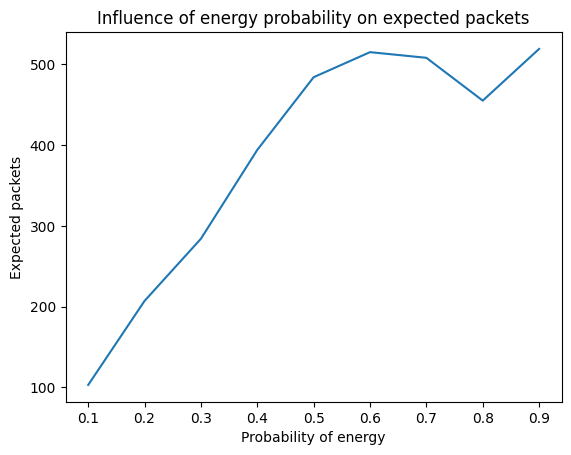

In [28]:
import matplotlib.pyplot as plt

plt.plot(p_values, expected_packets_list)
plt.xlabel('Probability of energy')
plt.ylabel('Expected packets')
plt.title('Influence of energy probability on expected packets')
plt.show()

Как видно из графика, при увеличении вероятности получения единицы энергии (от 0.1 до 0.9), математическое ожидание количества переданных пакетов также увеличивается, что логично. При p=0.1 ожидаемое количество переданных пакетов составляет около 100, а при p=0.9 - около 475.